In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
import scrape_yahoo

In [3]:
df = scrape_yahoo.load_summary_csv()

In [4]:
df.iloc[123]

Unnamed: 0                                     0
game_date                       2021-11-05-10:00
away_team                               Brooklyn
home_team                                Detroit
pregame_odds                     -9.5, O/U 209.5
total_over_points                          209.5
total_over_stake_percentage                79.23
total_over_wager_percentage                76.32
total_over_odds                             -110
total_over_decimal_odds                     1.91
total_over_won                             False
total_under_points                         209.5
total_under_stake_percentage               20.77
total_under_wager_percentage               23.68
total_under_odds                            -110
total_under_decimal_odds                    1.91
total_under_won                             True
money_away_odds                             -450
money_away_decimal_odds                     1.22
money_away_stake_percentage                86.88
money_away_wager_per

In [5]:
import collections

money_spread_eq = collections.defaultdict(list)

for idx, game in df.iterrows():
    money_spread_eq[game.spread_home_points].append(game.money_home_odds)
    money_spread_eq[game.spread_away_points].append(game.money_away_odds)


TODO? drop ones where the count is less than `n` for a particular spread value

In [6]:

median_money_spread = {}

for spread, money_lines in money_spread_eq.items():
    median_money_spread[spread] = np.median(money_lines)

In [7]:
mms_df = pd.Series(median_money_spread).dropna()

for instance, spread -3.5 has value -160 on the money line but +3.5 has +135 on the money line.

Is the true value -160, implying the underdog is getting screwed, or +135, implying the favorite is getting screwed? it could be either way, right?

you need to convert these to chances of winning, and look at the overround.

In [8]:
mms_df = mms_df[mms_df.index.astype("str").str.endswith(".5")]

In [9]:
print(mms_df.sort_index().to_markdown())

|       |        0 |
|------:|---------:|
| -22.5 |  -5000   |
| -21.5 | -10000   |
| -20.5 |  -5000   |
| -19.5 |  -3000   |
| -18.5 |  -2500   |
| -17.5 |  -2000   |
| -16.5 |  -1600   |
| -15.5 |  -1400   |
| -14.5 |  -1100   |
| -13.5 |  -1000   |
| -12.5 |   -750   |
| -11.5 |   -650   |
| -10.5 |   -550   |
|  -9.5 |   -450   |
|  -8.5 |   -375   |
|  -7.5 |   -300   |
|  -6.5 |   -250   |
|  -5.5 |   -225   |
|  -4.5 |   -190   |
|  -3.5 |   -160   |
|  -2.5 |   -140   |
|  -1.5 |   -120   |
|  -0.5 |   -112.5 |
|   0.5 |   -107.5 |
|   1.5 |    100   |
|   2.5 |    115   |
|   3.5 |    135   |
|   4.5 |    155   |
|   5.5 |    180   |
|   6.5 |    200   |
|   7.5 |    240   |
|   8.5 |    290   |
|   9.5 |    340   |
|  10.5 |    400   |
|  11.5 |    475   |
|  12.5 |    525   |
|  13.5 |    625   |
|  14.5 |    700   |
|  15.5 |    800   |
|  16.5 |    900   |
|  17.5 |   1000   |
|  18.5 |   1100   |
|  19.5 |   1200   |
|  20.5 |   1500   |
|  21.5 |   1750   |
|  22.5 |   1

In [10]:
100/725

0.13793103448275862

In [11]:
1000/1100

0.9090909090909091

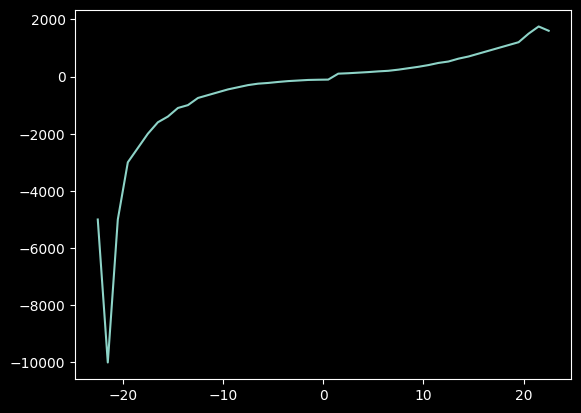

In [12]:
plt.plot(mms_df.sort_index())

In [13]:
mms_df.sort_index()

-22.5    -5000.0
-21.5   -10000.0
-20.5    -5000.0
-19.5    -3000.0
-18.5    -2500.0
-17.5    -2000.0
-16.5    -1600.0
-15.5    -1400.0
-14.5    -1100.0
-13.5    -1000.0
-12.5     -750.0
-11.5     -650.0
-10.5     -550.0
-9.5      -450.0
-8.5      -375.0
-7.5      -300.0
-6.5      -250.0
-5.5      -225.0
-4.5      -190.0
-3.5      -160.0
-2.5      -140.0
-1.5      -120.0
-0.5      -112.5
 0.5      -107.5
 1.5       100.0
 2.5       115.0
 3.5       135.0
 4.5       155.0
 5.5       180.0
 6.5       200.0
 7.5       240.0
 8.5       290.0
 9.5       340.0
 10.5      400.0
 11.5      475.0
 12.5      525.0
 13.5      625.0
 14.5      700.0
 15.5      800.0
 16.5      900.0
 17.5     1000.0
 18.5     1100.0
 19.5     1200.0
 20.5     1500.0
 21.5     1750.0
 22.5     1600.0
dtype: float64

In [14]:
import statsmodels.api as sm

In [15]:
mms_df = mms_df.sort_values()

In [16]:
mms_smoothed = sm.nonparametric.lowess(exog=mms_df.index, endog=mms_df.values, frac=0.2)

In [17]:
mms_smoothed

array([[-2.25000000e+01, -5.00000000e+03],
       [-2.15000000e+01, -1.00000000e+04],
       [-2.05000000e+01, -5.00000000e+03],
       [-1.95000000e+01, -3.00000000e+03],
       [-1.85000000e+01, -2.50000000e+03],
       [-1.75000000e+01, -2.00000000e+03],
       [-1.65000000e+01, -1.60000000e+03],
       [-1.55000000e+01, -1.40000000e+03],
       [-1.45000000e+01, -1.20085443e+03],
       [-1.35000000e+01, -1.02022129e+03],
       [-1.25000000e+01, -8.54967362e+02],
       [-1.15000000e+01, -7.05415443e+02],
       [-1.05000000e+01, -5.71564828e+02],
       [-9.50000000e+00, -4.62247095e+02],
       [-8.50000000e+00, -3.86030275e+02],
       [-7.50000000e+00, -3.22476208e+02],
       [-6.50000000e+00, -2.69885752e+02],
       [-5.50000000e+00, -2.27280489e+02],
       [-4.50000000e+00, -1.94080184e+02],
       [-3.50000000e+00, -1.67061927e+02],
       [-2.50000000e+00, -1.43480501e+02],
       [-1.50000000e+00, -1.18910112e+02],
       [-5.00000000e-01, -6.45517087e+01],
       [ 5.

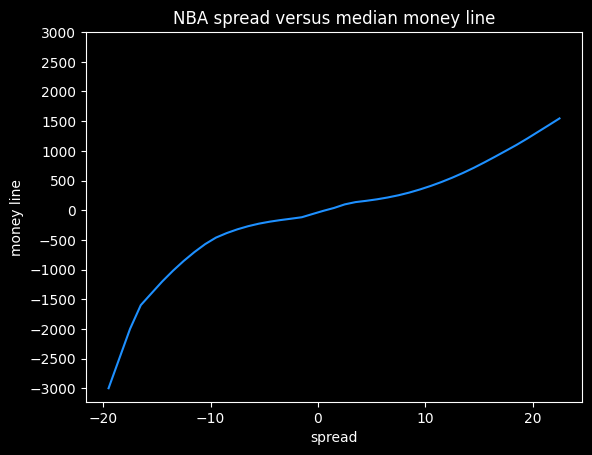

In [18]:
plt.plot(mms_smoothed[3:,0], mms_smoothed[3:,1], color='dodgerblue')
plt.xlabel("spread")
plt.ylabel("money line")
plt.yticks(range(-3000, 3500, 500))
_out = plt.title("NBA spread versus median money line")

In [19]:
# this is a smoothed version of the median prices
# I don't think I need smoothing, though.

retail_df = pd.DataFrame(mms_smoothed)
retail_df = retail_df.set_index(0)


-2000 implies a 20/21 chance of winning

In [20]:
20/21

0.9523809523809523

a 1/21 chance of winning should pay out +2000, so the graph should be symmetrical. but you can get +20 on the spread for around +1500, while -20 on the spread will cost you around -2800. the game is figuring out how much vig is on which side

I will call these prices the `retail` prices, to avoid confusion with the `fair` (no vig) prices

In [21]:
print(retail_df.to_markdown())

|     0 |           1 |
|------:|------------:|
| -22.5 |  -5000      |
| -21.5 | -10000      |
| -20.5 |  -5000      |
| -19.5 |  -3000      |
| -18.5 |  -2500      |
| -17.5 |  -2000      |
| -16.5 |  -1600      |
| -15.5 |  -1400      |
| -14.5 |  -1200.85   |
| -13.5 |  -1020.22   |
| -12.5 |   -854.967  |
| -11.5 |   -705.415  |
| -10.5 |   -571.565  |
|  -9.5 |   -462.247  |
|  -8.5 |   -386.03   |
|  -7.5 |   -322.476  |
|  -6.5 |   -269.886  |
|  -5.5 |   -227.28   |
|  -4.5 |   -194.08   |
|  -3.5 |   -167.062  |
|  -2.5 |   -143.481  |
|  -1.5 |   -118.91   |
|  -0.5 |    -64.5517 |
|   0.5 |    -11.26   |
|   1.5 |     37.4521 |
|   2.5 |     97.7531 |
|   3.5 |    135.84   |
|   4.5 |    157.642  |
|   5.5 |    183.062  |
|   6.5 |    213.915  |
|   7.5 |    251.114  |
|   8.5 |    296.058  |
|   9.5 |    348.961  |
|  10.5 |    408.128  |
|  11.5 |    474.136  |
|  12.5 |    546.835  |
|  13.5 |    626.087  |
|  14.5 |    712.105  |
|  15.5 |    804.696  |
|  16.5 |    901

# The second way, counting values

calculating `fair` prices for the money lines based on how frequently teams at different lines win


I'll give an example of just calculating it for a spread of +3.5. `money_away_won == True` means the away team won outright.

In [22]:
df[df.spread_away_points == 3.5].money_away_won.value_counts() / len(df[df.spread_away_points == 3.5])

money_away_won
False    0.666667
True     0.333333
Name: count, dtype: float64

In [23]:
len(df[df.spread_away_points == 3.5])

309

In [24]:
df[df.spread_home_points == 3.5].money_home_won.value_counts() / len(df[df.spread_home_points == 3.5])

money_home_won
False    0.609244
True     0.390756
Name: count, dtype: float64

as expected, there is a lower volume of games where the home team is getting 3.5 points than away teams.

In [25]:
len(df[df.spread_home_points == 3.5])

238

the difference in winning percentages is interesting but isn't significant. the win % will have a margin of error around 6.5% either way

In [26]:
1/np.sqrt(238)

np.float64(0.06482037235521644)

### doing it with a groupby



need to do home and away lines separately, then combine

In [27]:
home_grouper = df.groupby("spread_home_points")

In [28]:
home_win_pcts = home_grouper.money_home_won.sum()/home_grouper.size()

In [29]:
away_grouper = df.groupby("spread_away_points")

away_win_pcts = away_grouper.money_away_won.sum()/away_grouper.size()

In [30]:
away_win_pcts

spread_away_points
-18.5    1.000000
-17.5    1.000000
-16.5    1.000000
-15.5    0.928571
-14.5    0.875000
           ...   
 18.5    0.000000
 19.5    0.100000
 20.5    0.000000
 21.5    0.000000
 22.5    0.000000
Length: 65, dtype: float64

these should be pretty similar

In [31]:
print((away_win_pcts - home_win_pcts).to_markdown())

|       |            0 |
|------:|-------------:|
| -22.5 | nan          |
| -21.5 | nan          |
| -20.5 | nan          |
| -19.5 | nan          |
| -18.5 |   0          |
| -17.5 |   0.130435   |
| -16.5 |   0.0740741  |
| -15.5 |   0.0505226  |
| -14.5 |  -0.0266393  |
| -13.5 |   0.103159   |
| -13   | nan          |
| -12.5 |  -0.0030303  |
| -12   | nan          |
| -11.5 |   0.044695   |
| -11   |  -1          |
| -10.5 |   0.0384923  |
| -10   |   0          |
|  -9.5 |  -0.0165453  |
|  -9   | nan          |
|  -8.5 |   0.0424409  |
|  -8   |   0.5        |
|  -7.5 |   0.00907119 |
|  -7   |   0.5        |
|  -6.5 |   0.0565968  |
|  -6   |  -0.1        |
|  -5.5 |   0.0509777  |
|  -5   |  -0.0833333  |
|  -4.5 |  -0.00311526 |
|  -4   |   0.583333   |
|  -3.5 |  -0.057423   |
|  -3   |   0.166667   |
|  -2.5 |  -0.00371311 |
|  -2   |  -0.428571   |
|  -1.5 |   0.054962   |
|  -1   |  -0.55       |
|  -0.5 |  -0.5        |
|   0.5 |  -0.5        |
|   1   |  -0.55       |


combining them

In [32]:
numer = home_grouper.money_home_won.sum() + away_grouper.money_away_won.sum()
denom = home_grouper.size() + away_grouper.size()


drop 0.5 and -0.5, they are too rare to worry about

In [33]:
win_ratios = numer/denom

del win_ratios[0.5]
del win_ratios[-0.5]

win_ratios = win_ratios.dropna()

drop whole number values, they are too noisy

In [34]:
win_ratios = win_ratios[win_ratios.index.astype("str").str.endswith(".5")]

In [35]:
print(win_ratios.to_markdown())

|       |         0 |
|------:|----------:|
| -18.5 | 1         |
| -17.5 | 0.888889  |
| -16.5 | 0.941176  |
| -15.5 | 0.890909  |
| -14.5 | 0.894118  |
| -13.5 | 0.889764  |
| -12.5 | 0.835616  |
| -11.5 | 0.832487  |
| -10.5 | 0.789474  |
|  -9.5 | 0.747212  |
|  -8.5 | 0.762763  |
|  -7.5 | 0.745763  |
|  -6.5 | 0.701299  |
|  -5.5 | 0.643892  |
|  -4.5 | 0.6       |
|  -3.5 | 0.641682  |
|  -2.5 | 0.562393  |
|  -1.5 | 0.525535  |
|   1.5 | 0.474465  |
|   2.5 | 0.437607  |
|   3.5 | 0.358318  |
|   4.5 | 0.4       |
|   5.5 | 0.356108  |
|   6.5 | 0.298701  |
|   7.5 | 0.254237  |
|   8.5 | 0.237237  |
|   9.5 | 0.252788  |
|  10.5 | 0.210526  |
|  11.5 | 0.167513  |
|  12.5 | 0.164384  |
|  13.5 | 0.110236  |
|  14.5 | 0.105882  |
|  15.5 | 0.109091  |
|  16.5 | 0.0588235 |
|  17.5 | 0.111111  |
|  18.5 | 0         |


In [36]:
ratios_smoothed = sm.nonparametric.lowess(exog=win_ratios.index, endog=win_ratios.values, frac=0.2)

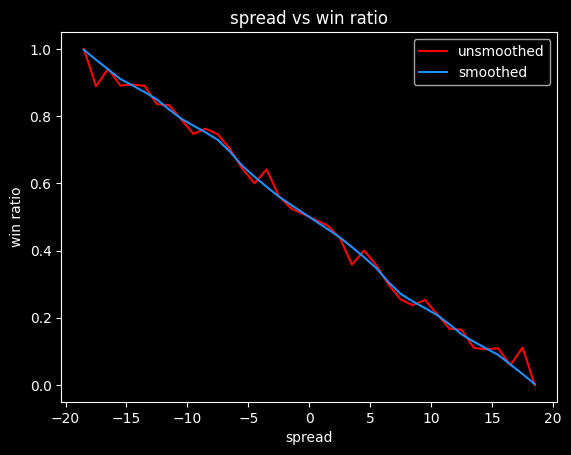

In [37]:
plt.plot(win_ratios.index, win_ratios.values, color='red', label='unsmoothed')
plt.plot(ratios_smoothed[:,0], ratios_smoothed[:,1], color='dodgerblue', label='smoothed')
plt.title("spread vs win ratio")
plt.xlabel("spread")
plt.legend()
_out = plt.ylabel("win ratio")

now convert these to money lines

In [38]:
## this was copy/pasted from the "GOOD ODDS" chapter

def convert_prob_to_money_line(proba):
    if proba > .5:
        money_line = -100 * (proba/(1-proba))
    else:
        money_line = 100 * ((1-proba) / proba)
    return round(money_line)

In [39]:
fair_ml_conv = pd.Series(map(convert_prob_to_money_line, ratios_smoothed[:,1]), index=ratios_smoothed[:,0])


the money lines at the edges are going to be crazy, so I'm dropping > 15.5 points

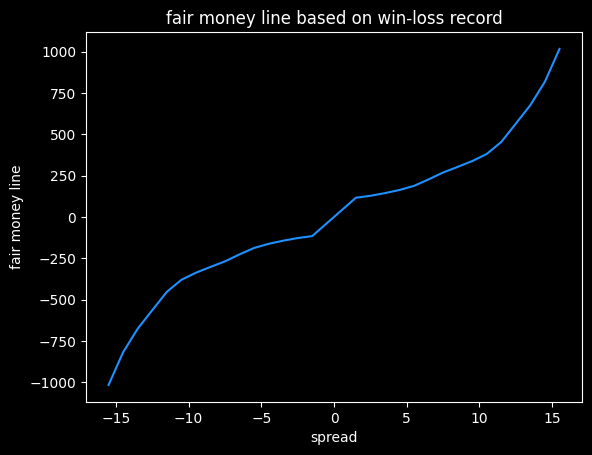

In [40]:
plt.title("fair money line based on win-loss record")
plt.plot(ratios_smoothed[3:-3,0], fair_ml_conv.iloc[3:-3], color='dodgerblue', label='smoothed')
plt.xlabel("spread")
_out = plt.ylabel("fair money line")

In [41]:
fair_moneyline = pd.Series(map(convert_prob_to_money_line, ratios_smoothed[:,1]), index=ratios_smoothed[:,0])

In [99]:
print(fair_moneyline.to_markdown())

|       |      0 |
|------:|-------:|
| -18.5 | -37317 |
| -17.5 |  -2999 |
| -16.5 |  -1540 |
| -15.5 |  -1017 |
| -14.5 |   -819 |
| -13.5 |   -677 |
| -12.5 |   -565 |
| -11.5 |   -454 |
| -10.5 |   -381 |
|  -9.5 |   -338 |
|  -8.5 |   -303 |
|  -7.5 |   -269 |
|  -6.5 |   -227 |
|  -5.5 |   -188 |
|  -4.5 |   -163 |
|  -3.5 |   -144 |
|  -2.5 |   -128 |
|  -1.5 |   -116 |
|   1.5 |    116 |
|   2.5 |    128 |
|   3.5 |    144 |
|   4.5 |    163 |
|   5.5 |    188 |
|   6.5 |    227 |
|   7.5 |    269 |
|   8.5 |    303 |
|   9.5 |    338 |
|  10.5 |    381 |
|  11.5 |    454 |
|  12.5 |    565 |
|  13.5 |    677 |
|  14.5 |    819 |
|  15.5 |   1017 |
|  16.5 |   1540 |
|  17.5 |   2999 |
|  18.5 |  37317 |


In [43]:
actual_moneyline = pd.Series(retail_df.loc[:,1].values, index=retail_df.index)

In [44]:
fair_vs_actual = pd.DataFrame({"fair": fair_moneyline, "actual": actual_moneyline}).dropna()

In [45]:
##  TODO: add in game counts
fair_vs_actual['num_games'] = denom.dropna()

In [46]:
fair_vs_actual

,fair,actual,num_games
-18.5,-37317.0,-2500.000000,9.0
-17.5,-2999.0,-2000.000000,27.0
-16.5,-1540.0,-1600.000000,34.0
-15.5,-1017.0,-1400.000000,55.0
-14.5,-819.0,-1200.854425,85.0
-13.5,-677.0,-1020.221293,127.0
-12.5,-565.0,-854.967362,146.0
-11.5,-454.0,-705.415443,197.0
-10.5,-381.0,-571.564828,247.0
-9.5,-338.0,-462.247095,269.0


In [47]:
fair_vs_actual['diff_amt'] = fair_vs_actual.fair - fair_vs_actual.actual

calculate the overround and such. we need to convert to win probabilities and compare those, since the american odds system is wack

In [48]:
# copypasted from ep 3 GOOD ODDS

# convert a money line to winning percentage
def convert_line(line):
    if line < 0:
        return abs(line)/(abs(line)+100)
    else:
        return 100/(100+line)

In [49]:
convert_line(-300)

0.75

In [50]:
fair_vs_actual = fair_vs_actual[abs(fair_vs_actual.index) < 14].copy()

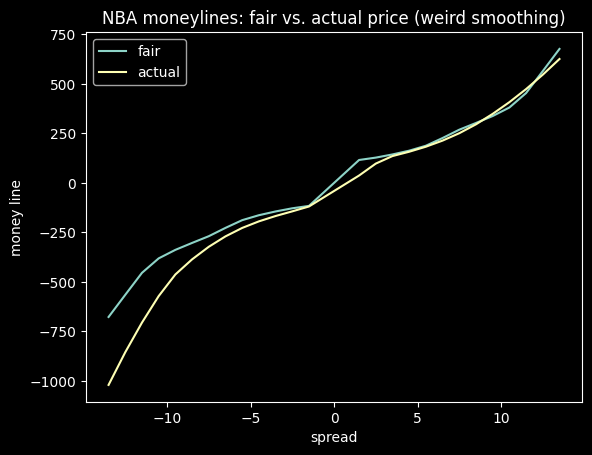

In [51]:
plt.plot(fair_vs_actual.index, fair_vs_actual.fair, label='fair')
plt.plot(fair_vs_actual.index, fair_vs_actual.actual, label='actual')
plt.title("NBA moneylines: fair vs. actual price (weird smoothing)")
plt.xlabel("spread")
_out = plt.ylabel("money line")
_out = plt.legend()

this is misleading though. I think converting back to probabilities and comparing the ratio of those is cleaner

In [52]:
fair_vs_actual['fair_pct']   = list(map(convert_line, fair_vs_actual.fair))
fair_vs_actual['actual_pct'] = list(map(convert_line, fair_vs_actual.actual))


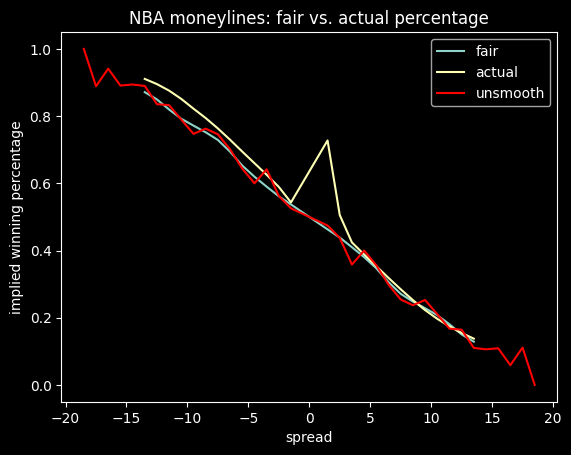

In [53]:
plt.plot(fair_vs_actual.index, fair_vs_actual.fair_pct, label='fair')
plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct, label='actual')

plt.plot(win_ratios.index, win_ratios.values, label="unsmooth", color='red')
plt.title("NBA moneylines: fair vs. actual percentage")
plt.xlabel("spread")
_out = plt.ylabel("implied winning percentage")
_out = plt.legend()

In [54]:
fair_vs_actual['pct_ratio'] = fair_vs_actual.actual_pct / fair_vs_actual.fair_pct

# TRY TRY AGAIN

new idea -- apply linear fit to the data instead of smoothing

In [55]:
for_training = win_ratios.iloc[2:-2]

In [56]:
for_training

-16.5    0.941176
-15.5    0.890909
-14.5    0.894118
-13.5    0.889764
-12.5    0.835616
-11.5    0.832487
-10.5    0.789474
-9.5     0.747212
-8.5     0.762763
-7.5     0.745763
-6.5     0.701299
-5.5     0.643892
-4.5     0.600000
-3.5     0.641682
-2.5     0.562393
-1.5     0.525535
 1.5     0.474465
 2.5     0.437607
 3.5     0.358318
 4.5     0.400000
 5.5     0.356108
 6.5     0.298701
 7.5     0.254237
 8.5     0.237237
 9.5     0.252788
 10.5    0.210526
 11.5    0.167513
 12.5    0.164384
 13.5    0.110236
 14.5    0.105882
 15.5    0.109091
 16.5    0.058824
dtype: float64

In [57]:
for_training.values

array([0.94117647, 0.89090909, 0.89411765, 0.88976378, 0.83561644,
       0.83248731, 0.78947368, 0.7472119 , 0.76276276, 0.74576271,
       0.7012987 , 0.64389234, 0.6       , 0.6416819 , 0.56239316,
       0.52553542, 0.47446458, 0.43760684, 0.3583181 , 0.4       ,
       0.35610766, 0.2987013 , 0.25423729, 0.23723724, 0.2527881 ,
       0.21052632, 0.16751269, 0.16438356, 0.11023622, 0.10588235,
       0.10909091, 0.05882353])

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
#for_training.index.to_numpy().reshape(-1,1)

In [60]:
lm = LinearRegression()
lm.fit(for_training.index.to_numpy().reshape(-1,1), for_training.values)

LinearRegression()

the intercept is .5 as we'd like it to be

In [61]:
print(lm.intercept_)

0.49999999999999994


In [62]:
print(lm.coef_)

[-0.02752967]


a 10.5 favorite wins 21% of the time, according to this

In [63]:
lm.predict(np.array([10.5]).reshape(1,-1))



array([0.21093845])

In [64]:
for_training

-16.5    0.941176
-15.5    0.890909
-14.5    0.894118
-13.5    0.889764
-12.5    0.835616
-11.5    0.832487
-10.5    0.789474
-9.5     0.747212
-8.5     0.762763
-7.5     0.745763
-6.5     0.701299
-5.5     0.643892
-4.5     0.600000
-3.5     0.641682
-2.5     0.562393
-1.5     0.525535
 1.5     0.474465
 2.5     0.437607
 3.5     0.358318
 4.5     0.400000
 5.5     0.356108
 6.5     0.298701
 7.5     0.254237
 8.5     0.237237
 9.5     0.252788
 10.5    0.210526
 11.5    0.167513
 12.5    0.164384
 13.5    0.110236
 14.5    0.105882
 15.5    0.109091
 16.5    0.058824
dtype: float64

In [65]:
## generate predictions for each spread level to get `actual2`

lm_percentages = pd.Series()

for spread in for_training.keys():
    lm_percentages[spread] = lm.predict(np.array([spread]).reshape(1,-1))[0]


In [66]:
fair_vs_actual.sample()

,fair,actual,num_games,diff_amt,fair_pct,actual_pct,pct_ratio
1.5,116.0,37.452148,607.0,78.547852,0.462963,0.727526,1.571456


In [67]:
## NOTE! lm_percentages are the estimate of the no-vig prices based on actual win frequency
## which has been smoothed.

fair_vs_actual['fair2_pct'] = lm_percentages

## then redo the graphs above with this better data

In [68]:
fair_vs_actual.sample()

,fair,actual,num_games,diff_amt,fair_pct,actual_pct,pct_ratio,fair2_pct
-13.5,-677.0,-1020.221293,127.0,343.221293,0.8713,0.910732,1.045257,0.871651


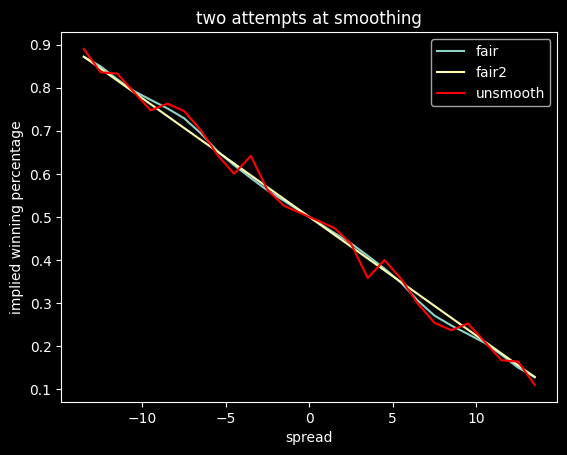

In [70]:
plt.plot(fair_vs_actual.index, fair_vs_actual.fair_pct, label='fair')
#plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct, label='actual')
plt.plot(fair_vs_actual.index, fair_vs_actual.fair2_pct, label='fair2')


## eliminate win ratios
unsmooth = win_ratios.iloc[5:-5].copy()

plt.plot(unsmooth.index, unsmooth.values, label="unsmooth", color='red')
plt.title("two attempts at smoothing")
plt.xlabel("spread")
_out = plt.ylabel("implied winning percentage")
_out = plt.legend()

need to look at unsmoothed version of the mms

In [75]:
mms_df.iloc[9:-9]

-13.5   -1000.0
-12.5    -750.0
-11.5    -650.0
-10.5    -550.0
-9.5     -450.0
-8.5     -375.0
-7.5     -300.0
-6.5     -250.0
-5.5     -225.0
-4.5     -190.0
-3.5     -160.0
-2.5     -140.0
-1.5     -120.0
-0.5     -112.5
 0.5     -107.5
 1.5      100.0
 2.5      115.0
 3.5      135.0
 4.5      155.0
 5.5      180.0
 6.5      200.0
 7.5      240.0
 8.5      290.0
 9.5      340.0
 10.5     400.0
 11.5     475.0
 12.5     525.0
 13.5     625.0
dtype: float64

In [76]:
fair_vs_actual['actual_unsmooth'] = mms_df.iloc[9:-9]

In [78]:
fair_vs_actual['actual_unsmooth_pct'] = list(map(convert_line, fair_vs_actual.actual_unsmooth))

In [79]:
fair_vs_actual

,fair,actual,num_games,diff_amt,fair_pct,actual_pct,pct_ratio,fair2_pct,actual_unsmooth,actual_unsmooth_pct
-13.5,-677.0,-1020.221293,127.0,343.221293,0.871300,0.910732,1.045257,0.871651,-1000.0,0.909091
-12.5,-565.0,-854.967362,146.0,289.967362,0.849624,0.895284,1.053742,0.844121,-750.0,0.882353
-11.5,-454.0,-705.415443,197.0,251.415443,0.819495,0.875840,1.068757,0.816591,-650.0,0.866667
-10.5,-381.0,-571.564828,247.0,190.564828,0.792100,0.851094,1.074478,0.789062,-550.0,0.846154
-9.5,-338.0,-462.247095,269.0,124.247095,0.771689,0.822142,1.065380,0.761532,-450.0,0.818182
-8.5,-303.0,-386.030275,333.0,83.030275,0.751861,0.794251,1.056381,0.734002,-375.0,0.789474
-7.5,-269.0,-322.476208,413.0,53.476208,0.728997,0.763300,1.047055,0.706473,-300.0,0.750000
-6.5,-227.0,-269.885752,462.0,42.885752,0.694190,0.729646,1.051076,0.678943,-250.0,0.714286
-5.5,-188.0,-227.280489,483.0,39.280489,0.652778,0.694452,1.063841,0.651413,-225.0,0.692308
-4.5,-163.0,-194.080184,535.0,31.080184,0.619772,0.659957,1.064838,0.623884,-190.0,0.655172


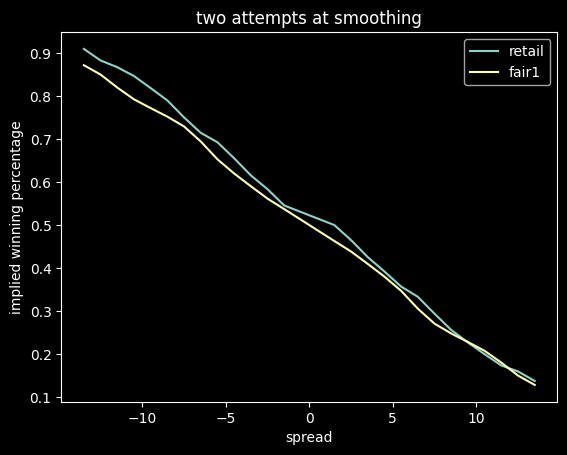

In [87]:
plt.plot(fair_vs_actual.index, fair_vs_actual.actual_unsmooth_pct, label='retail')
#plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct, label='actual')
plt.plot(fair_vs_actual.index, fair_vs_actual.fair_pct, label='fair1')

#plt.plot(fair_vs_actual.index, fair_vs_actual.fair2_pct, label='fair2')


## eliminate win ratios
unsmooth = win_ratios.iloc[5:-5].copy()

#plt.plot(unsmooth.index, unsmooth.values, label="unsmooth", color='red')
plt.title("two attempts at smoothing")
plt.xlabel("spread")
_out = plt.ylabel("implied winning percentage")
_out = plt.legend()

OK, this is a little distorted, the winning percentages should be closer together when they are smaller. I should be looking at the ratio of the two

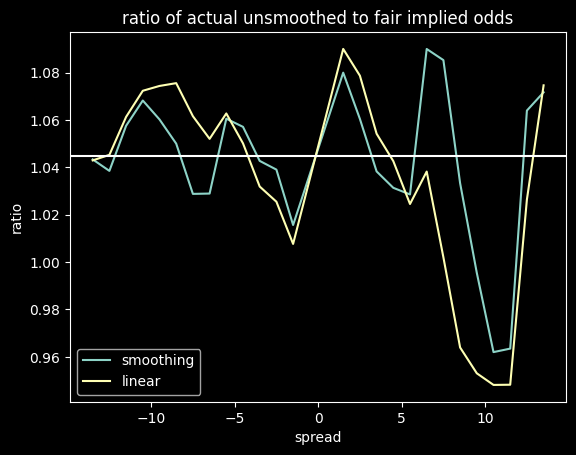

In [96]:
# plt.plot(fair_vs_actual.index, fair_vs_actual.actual_unsmooth_pct, label='retail')
# #plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct, label='actual')
# plt.plot(fair_vs_actual.index, fair_vs_actual.fair_pct, label='fair1')

plt.plot(fair_vs_actual.index, fair_vs_actual.actual_unsmooth_pct/fair_vs_actual.fair_pct, label='smoothing' )

plt.plot(fair_vs_actual.index, fair_vs_actual.actual_unsmooth_pct/fair_vs_actual.fair2_pct, label='linear' )

plt.axhline(1.045, color="white")
#plt.plot(fair_vs_actual.index, fair_vs_actual.fair2_pct, label='fair2')


## eliminate win ratios
unsmooth = win_ratios.iloc[5:-5].copy()

#plt.plot(unsmooth.index, unsmooth.values, label="unsmooth", color='red')
plt.title("ratio of actual unsmoothed to fair implied odds")
plt.xlabel("spread")
_out = plt.ylabel("ratio")
_out = plt.legend()

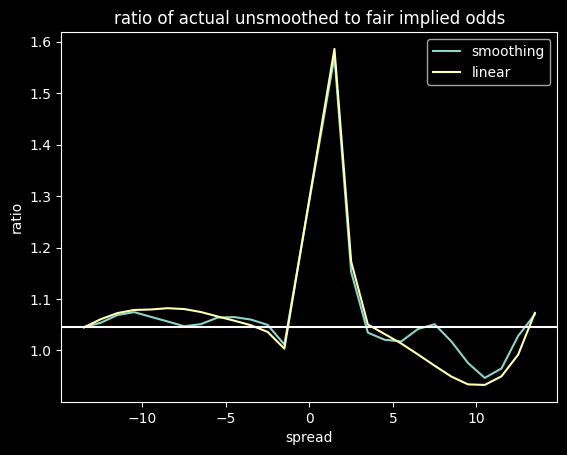

In [97]:
plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct/fair_vs_actual.fair_pct, label='smoothing' )

plt.plot(fair_vs_actual.index, fair_vs_actual.actual_pct/fair_vs_actual.fair2_pct, label='linear' )

plt.axhline(1.045, color="white")
#plt.plot(fair_vs_actual.index, fair_vs_actual.fair2_pct, label='fair2')


## eliminate win ratios
unsmooth = win_ratios.iloc[5:-5].copy()

#plt.plot(unsmooth.index, unsmooth.values, label="unsmooth", color='red')
plt.title("ratio of actual unsmoothed to fair implied odds")
plt.xlabel("spread")
_out = plt.ylabel("ratio")
_out = plt.legend()